# Sapheneia TimesFM Webapp Mirror

This notebook mirrors the webapp functionality exactly, using the same `/src` code.
Run cells sequentially to replicate the complete webapp workflow.

## Features:
- Model initialization
- Data upload and processing
- Forecasting with quantiles
- Dynamic quantile band visualization
- Data export

## Prerequisites:
```bash
source .venv/bin/activate
```


## 1. Setup and Imports

Import the same modules used by the webapp.


In [52]:
# Configure notebook environment (same as webapp)
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import json
import logging
from datetime import datetime

# Add src to path for imports (same as webapp)
sys.path.append('../src')

# Core imports (same as webapp)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sapheneia TimesFM imports (same as webapp)
from model import TimesFMModel
from data import DataProcessor
from forecast import Forecaster
from visualization import Visualizer

# Configure logging (same as webapp)
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

print("🚀 Sapheneia TimesFM Webapp Mirror Ready!")
print(f"📅 Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("📁 Using /src modules directly (same as webapp)")


🚀 Sapheneia TimesFM Webapp Mirror Ready!
📅 Started: 2025-09-16 20:50:29
📁 Using /src modules directly (same as webapp)


## 2. Initialization

Initialize global variables


In [53]:
# =============================================================================
# INITIALIZATION
# =============================================================================

# Global variables
current_model = None
current_data_processor = None
current_forecaster = None
current_visualizer = None
current_data = None
current_results = None

## 3. Model Initialization (Mirrors webapp /api/model/init)

Initialize the TimesFM model using the same logic as the webapp.


In [54]:
# =============================================================================
# MODEL CONFIGURATION
# =============================================================================

# Model Configuration
BACKEND = "cpu"  # Options: "cpu", "gpu", "tpu"
CONTEXT_LEN = 64
HORIZON_LEN = 24
CHECKPOINT = "google/timesfm-2.0-500m-pytorch"  # Same as webapp default
LOCAL_MODEL_PATH = None

print(f"   Backend: {BACKEND}")
print(f"   Context Length: {CONTEXT_LEN}")
print(f"   Horizon Length: {HORIZON_LEN}")
print(f"   Checkpoint: {CHECKPOINT}")

   Backend: cpu
   Context Length: 64
   Horizon Length: 24
   Checkpoint: google/timesfm-2.0-500m-pytorch


In [55]:
# =============================================================================
# MODEL INITIALIZATION (Mirrors webapp/api/model/init)
# =============================================================================

print("🤖 Initializing TimesFM Model (webapp logic)...")

try:
    # Create model wrapper (same as webapp)
    current_model = TimesFMModel(
        backend=BACKEND,
        context_len=CONTEXT_LEN,
        horizon_len=HORIZON_LEN,
        checkpoint=CHECKPOINT,
        local_model_path=LOCAL_MODEL_PATH
    )
    
    # Load the model (same as webapp)
    timesfm_model = current_model.load_model()
    
    # Get model info (same as webapp)
    model_info = current_model.get_model_info()
    
    print("✅ Model Initialization Successful!")
    print("\n📋 Model Information:")
    for key, value in model_info.items():
        if key != 'capabilities':
            print(f"   {key:20} = {value}")
    
    print("\n🔧 Model Capabilities:")
    for capability, available in model_info['capabilities'].items():
        status = "✅" if available else "❌"
        print(f"   {status} {capability}")
    
    # Initialize forecaster (same as webapp)
    current_forecaster = Forecaster(timesfm_model)
    print("\n✅ Forecaster initialized")
    
    # Initialize visualizer (same as webapp)
    current_visualizer = Visualizer(style="professional")
    print("✅ Visualizer initialized")
    
except Exception as e:
    print(f"❌ Model initialization failed: {str(e)}")
    import traceback
    traceback.print_exc()
    current_model = None


INFO:model:TimesFM Model Configuration:
INFO:model:  Backend: cpu
INFO:model:  Context Length: 64
INFO:model:  Horizon Length: 24
INFO:model:  Batch Size: 1
INFO:model:  Layers: 50
INFO:model:  Checkpoint: google/timesfm-2.0-500m-pytorch
INFO:model:Initializing TimesFM model...
INFO:model:Loading from HuggingFace: google/timesfm-2.0-500m-pytorch


🤖 Initializing TimesFM Model (webapp logic)...


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:root:Loading checkpoint from /Users/marcelo/.cache/huggingface/hub/models--google--timesfm-2.0-500m-pytorch/snapshots/dc2443792ce5516872b89b37cf1bc058c3bf0c10/torch_model.ckpt
INFO:root:Sending checkpoint to device cpu
INFO:model:⚠️  Model validation skipped due to TimesFM shape constraints
INFO:model:✅ TimesFM model loaded successfully!
INFO:forecast:Forecaster initialized with capabilities: ['basic_forecasting', 'quantile_forecasting', 'covariates_support']
INFO:visualization:Visualizer initialized with 'professional' style


✅ Model Initialization Successful!

📋 Model Information:
   status               = loaded
   backend              = cpu
   context_len          = 64
   horizon_len          = 24
   batch_size           = 1
   num_layers           = 50
   positional_embedding = False
   checkpoint           = google/timesfm-2.0-500m-pytorch

🔧 Model Capabilities:
   ✅ basic_forecasting
   ✅ quantile_forecasting
   ✅ covariates_support

✅ Forecaster initialized
✅ Visualizer initialized


## 4. Data Upload and Processing (Mirrors webapp /api/data/upload)

Load and process data using the same logic as the webapp.


In [56]:
# Data Configuration
DATA_FILE = "../data/sample_financial_data.csv"  # Use the same data as webapp
DATA_DEFINITION_FILE = "../data/sample_data_definition.json"

print(f"   Data File: {DATA_FILE}")
print(f"   Data File: {DATA_DEFINITION_FILE}")

   Data File: ../data/sample_financial_data.csv
   Data File: ../data/sample_data_definition.json


In [57]:
# =============================================================================
# DATA UPLOAD AND PROCESSING (Mirrors webapp/api/data/upload)
# =============================================================================

print("📊 Processing Data (webapp logic)...")

try:
    # Initialize data processor (same as webapp)
    current_data_processor = DataProcessor()
    
    # Load CSV data (same as webapp)
    if not os.path.exists(DATA_FILE):
        print(f"❌ Data file not found: {DATA_FILE}")
        print("   Please ensure the data file exists or update DATA_FILE path")
        current_data = None
    else:
        # Load and process data (same as webapp)
        processed_data = current_data_processor.load_csv_data(DATA_FILE, DATA_DEFINITION_FILE)
        
        # Get data summary (same as webapp)
        data_summary = current_data_processor.get_data_summary()
        
        print("✅ Data Processing Successful!")

        print(f"\n📋 Data Summary:")
        # print(f"   Filename: {data_summary['filename']}")
        print(f"   Shape: {data_summary['shape']}")
        print(f"   Columns: {data_summary['columns']}")
        print(f"   Date Range: {data_summary['date_range']['start']} to {data_summary['date_range']['end']}")
        print(f"   Total Periods: {data_summary['date_range']['total_periods']}")
        
        # Store current data (same as webapp)
        current_data = {
            'processed_data': processed_data,
            'data_summary': data_summary
        }
        
        # Display data preview (same as webapp)
        print(f"\n📊 Data Preview:")
        print(processed_data.head())
        
except Exception as e:
    print(f"❌ Data processing failed: {str(e)}")
    import traceback
    traceback.print_exc()
    current_data = None


INFO:data:Loading CSV data from: ../data/sample_financial_data.csv
INFO:data:Data definition: {'btc_price': 'target', 'eth_price': 'dynamic_numerical', 'sp500_price': 'dynamic_numerical', 'vix_index': 'dynamic_numerical', 'quarter': 'dynamic_categorical', 'asset_category': 'static_categorical', 'base_volatility': 'static_numerical'}
INFO:data:Loaded CSV with shape: (200, 8)
INFO:data:Columns: ['date', 'btc_price', 'eth_price', 'sp500_price', 'vix_index', 'quarter', 'asset_category', 'base_volatility']
INFO:data:Date range: 2020-01-01 00:00:00 to 2023-10-25 00:00:00
INFO:data:Applying data type conversions...
INFO:data:Converted 'btc_price' to numerical (float)
INFO:data:Converted 'eth_price' to numerical (float)
INFO:data:Converted 'sp500_price' to numerical (float)
INFO:data:Converted 'vix_index' to numerical (float)
INFO:data:Converted 'quarter' to categorical (string)
INFO:data:Converted 'asset_category' to categorical (string)
INFO:data:Converted 'base_volatility' to numerical (flo

📊 Processing Data (webapp logic)...
✅ Data Processing Successful!

📋 Data Summary:
   Shape: (200, 8)
   Columns: ['date', 'btc_price', 'eth_price', 'sp500_price', 'vix_index', 'quarter', 'asset_category', 'base_volatility']
   Date Range: 2020-01-01 to 2023-10-25
   Total Periods: 200

📊 Data Preview:
        date     btc_price    eth_price  sp500_price  vix_index quarter  \
0 2020-01-01  26013.430364  1588.727652  3390.150838  10.000000       1   
1 2020-01-08  25100.391012  1548.251193  3461.423742  17.948095       1   
2 2020-01-15  27130.339084  1715.970987  3506.705132  21.053434       1   
3 2020-01-22  29524.603368  1864.815465  3512.809512  22.375488       1   
4 2020-01-29  26015.074894  1453.383978  3481.209356  23.771260       1   

   asset_category  base_volatility  
0  cryptocurrency             0.08  
1  cryptocurrency             0.08  
2  cryptocurrency             0.08  
3  cryptocurrency             0.08  
4  cryptocurrency             0.08  


## 5. Data Definition (Mirrors webapp data definition logic)

Define how each column should be interpreted by TimesFM.


In [58]:
# =============================================================================
# DATA DEFINITION (Mirrors webapp data definition logic)
# =============================================================================

if current_data is not None:
    print("🏗️ Creating Data Definition (webapp logic)...")
    
    # Get columns from processed data
    columns = current_data['data_summary']['columns']
    
    # Create data definition (same logic as webapp)
    data_definition = {}
    for i, col in enumerate(columns):
        if col == 'date':
            continue  # Skip date column
        elif i == 1:  # First non-date column is target
            data_definition[col] = 'target'
        else:
            # Determine type based on column name and data
            if 'price' in col.lower() or 'value' in col.lower():
                data_definition[col] = 'dynamic_numerical'
            elif 'index' in col.lower() or 'rate' in col.lower():
                data_definition[col] = 'dynamic_numerical'
            else:
                data_definition[col] = 'dynamic_numerical'  # Default
    
    print("✅ Data Definition Created:")
    for column, dtype in data_definition.items():
        print(f"   {column:20} -> {dtype}")
    
    # Store data definition
    current_data['data_definition'] = data_definition
    
else:
    print("❌ No data available for definition")
    data_definition = None


🏗️ Creating Data Definition (webapp logic)...
✅ Data Definition Created:
   btc_price            -> target
   eth_price            -> dynamic_numerical
   sp500_price          -> dynamic_numerical
   vix_index            -> dynamic_numerical
   quarter              -> dynamic_numerical
   asset_category       -> dynamic_numerical
   base_volatility      -> dynamic_numerical


## 6. Forecasting (Mirrors webapp /api/forecast)

Perform forecasting using the same logic as the webapp.


In [59]:
# Forecasting Configuration (same as webapp)
USE_COVARIATES = True
USE_QUANTILES = True  # Always True in webapp
FREQ = 0  # Same as webapp

print(f"   Use Covariates: {USE_COVARIATES}")

   Use Covariates: True


In [60]:
# =============================================================================
# FORECASTING (Mirrors webapp/api/forecast)
# =============================================================================

if current_model is not None and current_data is not None and current_forecaster is not None:
    print("🔮 Running Forecast (webapp logic)...")
    
    try:
        # Prepare forecast data (same as webapp)
        processed_data = current_data['processed_data']
        data_definition = current_data['data_definition']
        
        # Prepare forecast inputs (same as webapp)
        target_inputs, covariates = current_data_processor.prepare_forecast_data(
            processed_data,
            context_len=CONTEXT_LEN,
            horizon_len=HORIZON_LEN,
            target_column="btc_price"  # Assuming BTC data
        )
        
        print(f"✅ Forecast data prepared:")
        print(f"   Target inputs length: {len(target_inputs)}")
        print(f"   Target range: ${min(target_inputs):,.0f} - ${max(target_inputs):,.0f}")
        print(f"   Covariates: {list(covariates.keys())}")
        
        # Perform forecasting (same as webapp - always get quantiles)
        results = {}
        
        # Covariates forecasting if requested and available (same as webapp)
        if USE_COVARIATES and any(covariates.values()):
            print("📊 Running covariates-enhanced forecasting...")
            try:
                enhanced_forecast, quantile_forecast = current_forecaster.forecast_with_covariates(
                    inputs=target_inputs,
                    dynamic_numerical_covariates=covariates.get('dynamic_numerical_covariates'),
                    dynamic_categorical_covariates=covariates.get('dynamic_categorical_covariates'),
                    static_numerical_covariates=covariates.get('static_numerical_covariates'),
                    static_categorical_covariates=covariates.get('static_categorical_covariates'),
                    freq=FREQ
                )
                results['enhanced_forecast'] = enhanced_forecast[0]
                # Always compute quantiles via standard forecast regardless of covariates support (same as webapp)
                try:
                    _, quantile_from_basic = current_forecaster.forecast(target_inputs, freq=FREQ)
                    if quantile_from_basic is not None:
                        results['quantile_forecast'] = quantile_from_basic[0]
                        print(f"✅ Quantiles (from basic forecast) shape: {quantile_from_basic.shape}")
                    else:
                        print("⚠️  No quantiles returned from basic forecast while using covariates")
                except Exception as qerr:
                    print(f"⚠️  Quantiles via basic forecast failed: {qerr}")
                main_forecast = enhanced_forecast[0]
            except Exception as e:
                print(f"⚠️  Covariates forecasting failed: {str(e)}")
                # Fallback to basic forecasting (same as webapp)
                USE_COVARIATES = False
        
        # Basic forecasting (if no covariates or covariates failed) (same as webapp)
        if not USE_COVARIATES or 'enhanced_forecast' not in results:
            print("📊 Running basic forecasting...")
            try:
                point_forecast, quantile_forecast = current_forecaster.forecast(target_inputs, freq=FREQ)
                results['point_forecast'] = point_forecast[0]
                if quantile_forecast is not None:
                    results['quantile_forecast'] = quantile_forecast[0]
                    print(f"✅ Quantile forecast shape: {quantile_forecast.shape}")
                else:
                    print("⚠️  No quantile forecast returned from model")
                main_forecast = point_forecast[0]
            except Exception as e:
                print(f"❌ Basic forecasting failed: {str(e)}")
                raise e
        
        # Store results (same as webapp)
        current_results = {
            'results': results,
            'visualization_data': {
                'historical_data': target_inputs,
                'dates_historical': processed_data['date'].iloc[:CONTEXT_LEN].tolist(),
                'dates_future': processed_data['date'].iloc[CONTEXT_LEN:CONTEXT_LEN + HORIZON_LEN].tolist(),
                'target_name': 'btc_price',
                'forecast': main_forecast,
                'title': 'Bitcoin Price Forecast'
            }
        }
        
        print("✅ Forecasting completed successfully!")
        print(f"   Forecast length: {len(main_forecast)} periods")
        print(f"   Forecast range: ${min(main_forecast):,.0f} - ${max(main_forecast):,.0f}")
        
    except Exception as e:
        print(f"❌ Forecasting failed: {str(e)}")
        import traceback
        traceback.print_exc()
        current_results = None
        
else:
    print("❌ Cannot run forecast - missing model, data, or forecaster")
    current_results = None


INFO:data:Preparing forecast data (context: 64, horizon: 24)


🔮 Running Forecast (webapp logic)...


INFO:data:Added dynamic numerical covariate 'eth_price': 88 values
INFO:data:Added dynamic numerical covariate 'sp500_price': 88 values
INFO:data:Added dynamic numerical covariate 'vix_index': 88 values
INFO:data:Added dynamic categorical covariate 'quarter': 88 values
INFO:data:Added static categorical covariate 'asset_category': cryptocurrency
INFO:data:Added static numerical covariate 'base_volatility': 0.08
INFO:data:✅ Prepared forecast data:
INFO:data:  Target inputs length: 64
INFO:data:  Target range: 21683.81 - 34801.48
INFO:data:  Covariates: ['dynamic_numerical_covariates', 'dynamic_categorical_covariates', 'static_numerical_covariates', 'static_categorical_covariates']
INFO:forecast:Performing covariates-enhanced forecasting (mode: xreg + timesfm)...


✅ Forecast data prepared:
   Target inputs length: 64
   Target range: $21,684 - $34,801
   Covariates: ['dynamic_numerical_covariates', 'dynamic_categorical_covariates', 'static_numerical_covariates', 'static_categorical_covariates']
📊 Running covariates-enhanced forecasting...


INFO:forecast:Validating covariates data structure...
INFO:forecast:✅ Covariates validation passed
INFO:forecast:✅ Covariates forecasting completed.
INFO:forecast:  Enhanced forecast shape: (1, 24)
INFO:forecast:Performing TimesFM forecasting with built-in quantiles...
INFO:forecast:✅ Forecast completed. point shape: (1, 24), quantiles: (1, 24, 10)


✅ Quantiles (from basic forecast) shape: (1, 24, 10)
✅ Forecasting completed successfully!
   Forecast length: 24 periods
   Forecast range: $26,593 - $34,785


## 7. Quantile Processing (Mirrors webapp quantile logic)

Process quantiles and create quantile bands using the same logic as the webapp.


In [61]:
# Quantile Configuration (same as webapp)
QUANTILE_INDICES = [1, 3, 5, 7, 9]  # Default webapp selection
QUANTILE_COLORS = ['#ff9999', '#99ccff', '#99ff99', '#ffcc99', '#cc99ff', '#ffff99']

print(f"   Use Quantiles: {USE_QUANTILES}")
print(f"   Quantile Indices: {QUANTILE_INDICES}")

   Use Quantiles: True
   Quantile Indices: [1, 3, 5, 7, 9]


In [62]:
# =============================================================================
# CORRECTED QUANTILE PROCESSING (Fixed to match webapp exactly)
# =============================================================================

# This cell replaces the quantile processing with the correct webapp logic

if current_results is not None and 'quantile_forecast' in current_results['results']:
    print("📊 Processing Quantiles (CORRECTED webapp logic)...")
    
    try:
        # Get quantile forecast (same as webapp)
        quantiles = np.array(current_results['results']['quantile_forecast'])
        
        # Ensure quantiles are sorted ascending (same as webapp)
        if quantiles.ndim == 2:
            try:
                if quantiles.shape[1] < quantiles.shape[0]:
                    # shape (horizon, num_q)
                    order = np.argsort(np.nanmedian(quantiles, axis=0))
                    quantiles = quantiles[:, order]
                else:
                    # shape (num_q, horizon)
                    order = np.argsort(np.nanmedian(quantiles, axis=1))
                    quantiles = quantiles[order, :]
            except Exception as e:
                print(f"   ⚠️  Could not sort quantiles: {e}")
            
            # Create quantile bands (same as webapp)
            if quantiles.shape[1] < quantiles.shape[0]:
                q_mat = quantiles
            else:
                q_mat = quantiles.T  # Make shape (horizon, num_q)
            
            num_q = q_mat.shape[1]
            print(f"   📊 Available quantiles: {num_q} (indices 0-{num_q-1})")
            
            # Create bands for selected quantile indices (same as webapp)
            selected_sorted = sorted([i for i in QUANTILE_INDICES if 0 <= i < num_q])
            if len(selected_sorted) >= 2:
                quantile_bands = {}
                
                # Use same logic as webapp: idx * 10 for 10 quantiles, general formula otherwise
                def idx_to_percent(idx: int) -> int:
                    if num_q == 10:
                        return idx * 10
                    return int(round(100 * (idx / (num_q - 1))))
                
                for i in range(len(selected_sorted) - 1):
                    lower_idx = selected_sorted[i]
                    upper_idx = selected_sorted[i + 1]
                    band_name = f'quantile_band_{i}'
                    quantile_bands[f'{band_name}_lower'] = q_mat[:, lower_idx].tolist()
                    quantile_bands[f'{band_name}_upper'] = q_mat[:, upper_idx].tolist()
                    
                    # Create readable labels using CORRECT webapp logic
                    lower_pct = idx_to_percent(lower_idx)
                    upper_pct = idx_to_percent(upper_idx)
                    quantile_bands[f'{band_name}_label'] = f"Q{lower_pct}–Q{upper_pct}"
                
                # Add to results (same as webapp)
                current_results['results']['quantile_bands'] = quantile_bands
                print(f"   ✅ Created {len(selected_sorted)-1} quantile bands from indices: {selected_sorted}")
                
                # Display band information
                for key in quantile_bands.keys():
                    if key.endswith('_label'):
                        band_name = key.replace('_label', '')
                        lower_key = f'{band_name}_lower'
                        upper_key = f'{band_name}_upper'
                        
                        if lower_key in quantile_bands and upper_key in quantile_bands:
                            lower_vals = quantile_bands[lower_key]
                            upper_vals = quantile_bands[upper_key]
                            
                            # Calculate average width
                            widths = [u - l for l, u in zip(lower_vals, upper_vals)]
                            avg_width = np.mean(widths)
                            
                            print(f"      {quantile_bands[key]:<12} Width: ${avg_width:,.0f}")
                
            else:
                print("   ⚠️  Need at least 2 quantile indices to create bands")
        else:
            print("   ⚠️  Quantile forecast is not 2D")
            
    except Exception as e:
        print(f"   ❌ Quantile processing failed: {str(e)}")
        import traceback
        traceback.print_exc()
else:
    print("❌ No quantile forecast available for processing")


📊 Processing Quantiles (CORRECTED webapp logic)...
   📊 Available quantiles: 10 (indices 0-9)
   ✅ Created 4 quantile bands from indices: [1, 3, 5, 7, 9]
      Q10–Q30      Width: $2,559
      Q30–Q50      Width: $1,035
      Q50–Q70      Width: $1,937
      Q70–Q90      Width: $2,712


## 8. Visualization (Mirrors webapp /api/visualize)

Create visualizations using the same logic as the webapp.


INFO:visualization:Creating forecast visualization: Bitcoin Price Forecast


🎨 Creating Visualization (webapp logic)...
   📊 Using quantile bands for visualization...


INFO:visualization:Plot saved to: webapp_mirror_forecast.png
INFO:visualization:✅ Forecast visualization completed


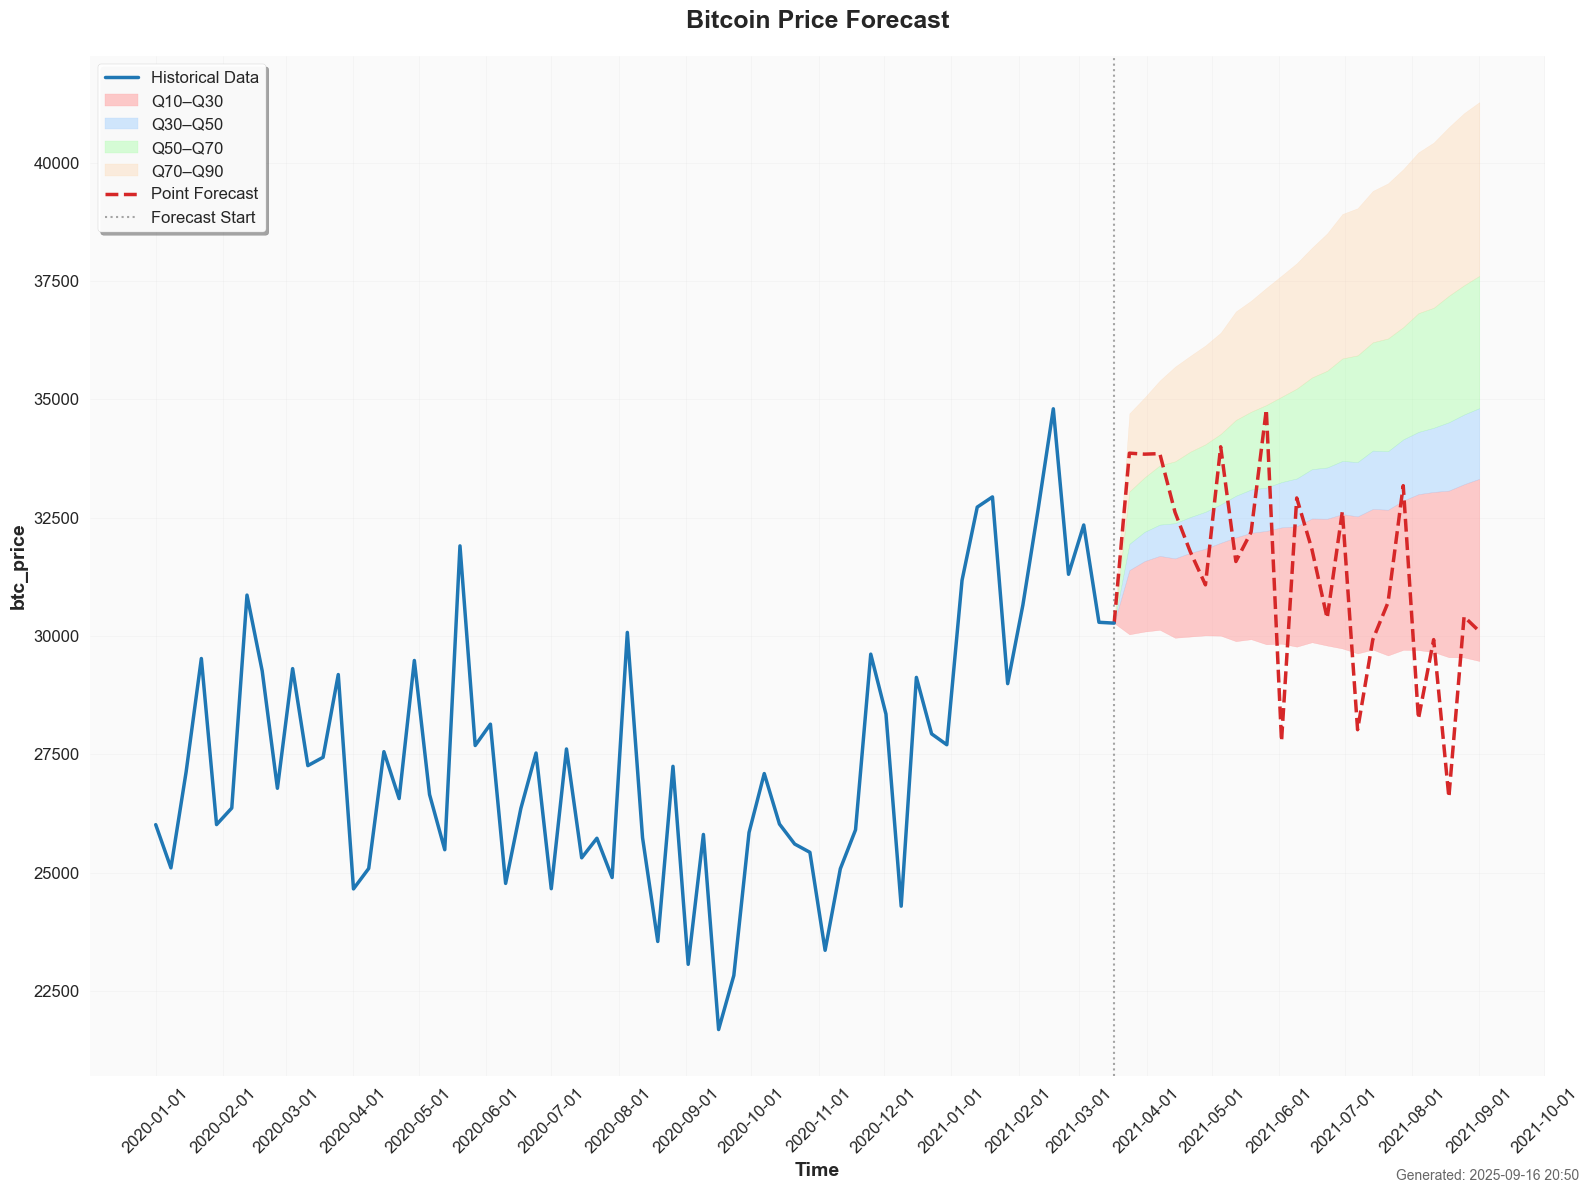

✅ Visualization completed successfully!
   Used quantile intervals: True
   Saved as: webapp_mirror_forecast.png


In [63]:
# =============================================================================
# VISUALIZATION (Mirrors webapp/api/visualize)
# =============================================================================

if current_results is not None and current_visualizer is not None:
    print("🎨 Creating Visualization (webapp logic)...")
    
    try:
        # Extract visualization data (same as webapp)
        viz_data = current_results['visualization_data']
        results = current_results['results']
        
        historical_data = viz_data['historical_data']
        dates_historical = viz_data['dates_historical']
        dates_future = viz_data['dates_future']
        target_name = viz_data['target_name']
        forecast = viz_data['forecast']
        title = viz_data['title']
        
        # Prepare intervals (same as webapp)
        intervals = {}
        used_quantile_intervals = False
        
        if 'quantile_bands' in results:
            print("   📊 Using quantile bands for visualization...")
            intervals = results['quantile_bands']
            used_quantile_intervals = True
        else:
            print("   📊 No quantile bands available")
        
        # Generate plot (same as webapp)
        fig = current_visualizer.plot_forecast_with_intervals(
            historical_data=historical_data,
            forecast=forecast,
            intervals=intervals,
            actual_future=None,  # No actual future data in this demo
            dates_historical=dates_historical,
            dates_future=dates_future,
            title=title,
            target_name=target_name,
            save_path="webapp_mirror_forecast.png"
        )
        
        plt.show()
        
        print("✅ Visualization completed successfully!")
        print(f"   Used quantile intervals: {used_quantile_intervals}")
        print(f"   Saved as: webapp_mirror_forecast.png")
        
    except Exception as e:
        print(f"❌ Visualization failed: {str(e)}")
        import traceback
        traceback.print_exc()
        
else:
    print("❌ Cannot create visualization - missing results or visualizer")


## 9. Data Export (Mirrors webapp download functionality)

Export forecast data including quantiles using the same logic as the webapp.


In [64]:
# =============================================================================
# FIX SYNTAX ERROR IN DATA EXPORT
# =============================================================================

# Fix the f-string syntax error by replacing the problematic line
# The issue is that f-strings cannot contain backslashes directly

if current_results is not None:
    print("🔧 Fixing syntax error in data export...")
    
    try:
        results = current_results['results']
        forecast = current_results['visualization_data']['forecast']
        forecast_length = len(forecast)
        
        # Create CSV content (same as webapp)
        csv_content = 'Period,Point_Forecast'
        
        # Add quantile columns (same as webapp)
        quantile_keys = [key for key in results.keys() if key.startswith('quantile_band_') and key.endswith('_lower')]
        sorted_quantile_keys = sorted(quantile_keys, key=lambda x: int(x.split('_')[2]))
        
        # Add column headers for quantile bands
        for key in sorted_quantile_keys:
            band_num = key.split('_')[2]
            label_key = f'quantile_band_{band_num}_label'
            label = results.get(label_key, f'Quantile_Band_{int(band_num)+1}')
            csv_content += f',{label}_Lower,{label}_Upper'
        
        # Add other method columns
        for method in results.keys():
            if not method.startswith('quantile_band_') and method != 'point_forecast' and method != 'enhanced_forecast':
                if isinstance(results[method], list):
                    method_name = method.replace('_', ' ').replace('\\b\\w', lambda m: m.group(0).upper())
                    csv_content += f',{method_name}'
        
        csv_content += '\\n'
        
        # Add data rows
        for i in range(forecast_length):
            csv_content += f'{i + 1},{forecast[i]}'
            
            # Add quantile data
            for key in sorted_quantile_keys:
                upper_key = key.replace('_lower', '_upper')
                lower_vals = results[key]
                upper_vals = results[upper_key]
                
                if lower_vals and upper_vals and i < len(lower_vals) and i < len(upper_vals):
                    csv_content += f',{lower_vals[i]},{upper_vals[i]}'
                else:
                    csv_content += ',,'
            
            # Add other method data
            for method, values in results.items():
                if not method.startswith('quantile_band_') and method != 'point_forecast' and method != 'enhanced_forecast':
                    if isinstance(values, list) and i < len(values):
                        csv_content += f',{values[i]}'
                    else:
                        csv_content += ','
            
            csv_content += '\\n'
        
        # Save to file
        csv_filename = f'sapheneia_forecast_data_{pd.Timestamp.now().strftime("%Y-%m-%d")}.csv'
        with open(csv_filename, 'w', encoding='utf-8') as f:
            f.write(csv_content)
        
        print("✅ Data export completed successfully!")
        print(f"   File: {csv_filename}")
        print(f"   Rows: {forecast_length}")
        
        # Fix the f-string syntax error by extracting newline character
        newline = '\\n'
        print(f"   Columns: {len(csv_content.split(newline)[0].split(','))}")
        
        # Display sample of exported data
        print("\\n📊 Sample of exported data:")
        sample_df = pd.read_csv(csv_filename)
        print(sample_df.head())
        
    except Exception as e:
        print(f"❌ Data export failed: {str(e)}")
        import traceback
        traceback.print_exc()
else:
    print("❌ No results available for export")


🔧 Fixing syntax error in data export...
✅ Data export completed successfully!
   File: sapheneia_forecast_data_2025-09-16.csv
   Rows: 24
   Columns: 2
\n📊 Sample of exported data:
Empty DataFrame
Columns: [Period, Point_Forecast\n1, 33863.55364147556, Unnamed: 3, \n2, 33842.71955402396, Unnamed: 6, \n3, 33854.17945463232, Unnamed: 9, \n4, 32615.324091521816, Unnamed: 12, \n5, 31782.78019269371, Unnamed: 15, \n6, 31081.437041486202, Unnamed: 18, \n7, 33999.149403561416, Unnamed: 21, \n8, 31574.19597392878, Unnamed: 24, \n9, 32195.568763032265, Unnamed: 27, \n10, 34785.40158675756, Unnamed: 30, \n11, 27776.060538386973, Unnamed: 33, \n12, 32917.48718087999, Unnamed: 36, \n13, 31828.835479136636, Unnamed: 39, \n14, 30376.470728207725, Unnamed: 42, \n15, 32634.77714273552, Unnamed: 45, \n16, 28019.57943369072, Unnamed: 48, \n17, 29922.96513298341, Unnamed: 51, \n18, 30707.48937443936, Unnamed: 54, \n19, 33177.183899855525, Unnamed: 57, \n20, 28249.68076671137, Unnamed: 60, \n21, 29924.205

In [65]:
# =============================================================================
# COMPREHENSIVE DATA EXPORT (Includes Raw Quantiles + Quantile Bands)
# =============================================================================

# Export both raw quantiles and quantile bands for complete data analysis

if current_results is not None:
    print("📁 Exporting Data (comprehensive quantile export)...")
    
    try:
        results = current_results['results']
        forecast = current_results['visualization_data']['forecast']
        forecast_length = len(forecast)
        
        # Create CSV content
        csv_content = 'Period,Point_Forecast'
        
        # Add raw quantile columns if available
        quantile_forecast = results.get('quantile_forecast')
        if quantile_forecast is not None:
            print("   📊 Adding raw quantile columns...")
            quantiles_array = np.array(quantile_forecast)
            if quantiles_array.ndim == 2:
                # Ensure shape is (horizon, num_quantiles)
                if quantiles_array.shape[1] < quantiles_array.shape[0]:
                    q_mat = quantiles_array
                else:
                    q_mat = quantiles_array.T
                
                num_quantiles = q_mat.shape[1]
                for i in range(num_quantiles):
                    # Use same percentage calculation as webapp
                    pct = i * 10 if num_quantiles == 10 else int(round(100 * (i / (num_quantiles - 1))))
                    csv_content += f',Q{pct:02d}'
                print(f"   ✅ Added {num_quantiles} raw quantile columns")
        
        # Add quantile band columns if available
        quantile_bands = results.get('quantile_bands', {})
        quantile_keys = [key for key in quantile_bands.keys() if key.startswith('quantile_band_') and key.endswith('_lower')]
        sorted_quantile_keys = sorted(quantile_keys, key=lambda x: int(x.split('_')[2]))
        
        if sorted_quantile_keys:
            print("   📊 Adding quantile band columns...")
            for key in sorted_quantile_keys:
                band_num = key.split('_')[2]
                label_key = f'quantile_band_{band_num}_label'
                label = quantile_bands.get(label_key, f'Quantile_Band_{int(band_num)+1}')
                csv_content += f',{label}_Lower,{label}_Upper'
            print(f"   ✅ Added {len(sorted_quantile_keys)} quantile band pairs")
        
        # Add other method columns
        for method in results.keys():
            if not method.startswith('quantile_band_') and method != 'point_forecast' and method != 'enhanced_forecast' and method != 'quantile_forecast':
                if isinstance(results[method], list):
                    method_name = method.replace('_', ' ').title()
                    csv_content += f',{method_name}'
        
        csv_content += '\\n'
        
        # Add data rows
        for i in range(forecast_length):
            csv_content += f'{i + 1},{forecast[i]}'
            
            # Add raw quantile data
            if quantile_forecast is not None:
                quantiles_array = np.array(quantile_forecast)
                if quantiles_array.ndim == 2:
                    if quantiles_array.shape[1] < quantiles_array.shape[0]:
                        q_mat = quantiles_array
                    else:
                        q_mat = quantiles_array.T
                    
                    for j in range(q_mat.shape[1]):
                        if i < len(q_mat[:, j]):
                            csv_content += f',{q_mat[i, j]}'
                        else:
                            csv_content += ','
            
            # Add quantile band data
            for key in sorted_quantile_keys:
                upper_key = key.replace('_lower', '_upper')
                lower_vals = quantile_bands.get(key, [])
                upper_vals = quantile_bands.get(upper_key, [])
                
                if lower_vals and upper_vals and i < len(lower_vals) and i < len(upper_vals):
                    csv_content += f',{lower_vals[i]},{upper_vals[i]}'
                else:
                    csv_content += ',,'
            
            # Add other method data
            for method, values in results.items():
                if not method.startswith('quantile_band_') and method != 'point_forecast' and method != 'enhanced_forecast' and method != 'quantile_forecast':
                    if isinstance(values, list) and i < len(values):
                        csv_content += f',{values[i]}'
                    else:
                        csv_content += ','
            
            csv_content += '\\n'
        
        # Save to file
        csv_filename = f'sapheneia_forecast_data_{pd.Timestamp.now().strftime("%Y-%m-%d")}.csv'
        with open(csv_filename, 'w', encoding='utf-8') as f:
            f.write(csv_content)
        
        print("✅ Data export completed successfully!")
        print(f"   File: {csv_filename}")
        print(f"   Rows: {forecast_length}")
        
        # Fix the f-string syntax error by extracting newline character
        newline = '\\n'
        print(f"   Columns: {len(csv_content.split(newline)[0].split(','))}")
        
        # Display sample of exported data
        print("\\n📊 Sample of exported data:")
        sample_df = pd.read_csv(csv_filename)
        print(sample_df.head())
        
        # Show column information
        print("\\n📋 Exported columns:")
        columns = csv_content.split(newline)[0].split(',')
        for i, col in enumerate(columns):
            print(f"   {i+1:2d}. {col}")
        
    except Exception as e:
        print(f"❌ Data export failed: {str(e)}")
        import traceback
        traceback.print_exc()
else:
    print("❌ No results available for export")

📁 Exporting Data (comprehensive quantile export)...
   📊 Adding raw quantile columns...
   ✅ Added 10 raw quantile columns
   📊 Adding quantile band columns...
   ✅ Added 4 quantile band pairs
✅ Data export completed successfully!
   File: sapheneia_forecast_data_2025-09-16.csv
   Rows: 24
   Columns: 20
\n📊 Sample of exported data:
Empty DataFrame
Columns: [Period, Point_Forecast, Q00, Q10, Q20, Q30, Q40, Q50, Q60, Q70, Q80, Q90, Q10–Q30_Lower, Q10–Q30_Upper, Q30–Q50_Lower, Q30–Q50_Upper, Q50–Q70_Lower, Q50–Q70_Upper, Q70–Q90_Lower, Q70–Q90_Upper\n1, 33863.55364147556, 31782.09375, 28859.875, 30036.28125, 30753.673828125, 31392.634765625, 31947.841796875, 32501.6015625, 33054.03515625, 33710.7890625, 34703.05078125, 30036.28125.1, 31392.634765625.1, 31392.634765625.2, 31947.841796875.1, 31947.841796875.2, 33054.03515625.1, 33054.03515625.2, 34703.05078125.1, \n2, 33842.71955402396, 31979.55859375, 28902.111328125, 30093.841796875, 30913.05078125, 31583.470703125, 32201.71875, 32745.85

## 10. Experimentation and Customization

Experiment with different quantile indices and configurations (mirrors webapp functionality).


In [ ]:
# =============================================================================
# EXPERIMENTATION AND CUSTOMIZATION (Mirrors webapp functionality)
# =============================================================================

print("🧪 Experimentation and Customization")
print("=" * 50)

print("\n💡 EXPERIMENT WITH DIFFERENT QUANTILE INDICES:")
print("   # Try different quantile combinations:")
print("   QUANTILE_INDICES = [0, 2, 4, 6, 8]  # More bands")
print("   QUANTILE_INDICES = [1, 5, 9]        # Fewer, wider bands")
print("   QUANTILE_INDICES = [2, 8]           # 20%-80% band only")
print("   QUANTILE_INDICES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # All bands")

print("\n💡 EXPERIMENT WITH DIFFERENT CONFIGURATIONS:")
print("   # Try different context/horizon lengths:")
print("   CONTEXT_LEN = 50   # Shorter context")
print("   HORIZON_LEN = 48   # Longer forecast")
print("   BACKEND = 'gpu'    # Use GPU if available")

print("\n💡 EXPERIMENT WITH DIFFERENT DATA:")
print("   # Load your own data:")
print("   DATA_FILE = 'path/to/your/data.csv'")
print("   # Update data_definition accordingly")

print("\n💡 REFRESH PLOT WITH NEW QUANTILE INDICES:")
print("   # To refresh the plot with new quantile indices:")
print("   # 1. Update QUANTILE_INDICES above")
print("   # 2. Re-run the Quantile Processing cell")
print("   # 3. Re-run the Visualization cell")

print("\n✅ WEBAPP MIRROR COMPLETE!")
print("   This notebook replicates the webapp functionality exactly.")
print("   Results should be identical between webapp and notebook.")
print("   Use this notebook for development and debugging.")


In [49]:
csv_filename

NameError: name 'csv_filename' is not defined